In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [3]:
data=pd.read_excel('C:/Users/shubham.chhetri/Desktop/MYPROJECT/Python/hiearchical.xlsx')

In [4]:
data

,var1,var2
0,2.00,2.0
1,5.50,4.0
2,5.00,5.0
3,1.50,2.5
4,1.00,1.0
5,7.00,5.0
6,5.75,6.5


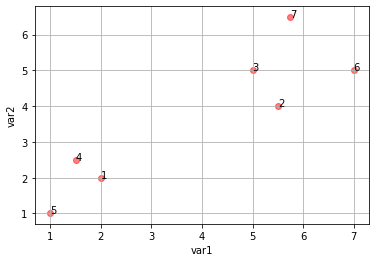

In [5]:
x=data['var1']
y=data['var2']
n=range(1,8)

fig,ax=plt.subplots()
ax.scatter(x,y,marker='o',c='red',alpha=0.5)
plt.grid()
plt.xlabel('var1')
plt.ylabel('var2')
for i,txt in enumerate(n):
    ax.annotate(txt,(x[i],y[i]))

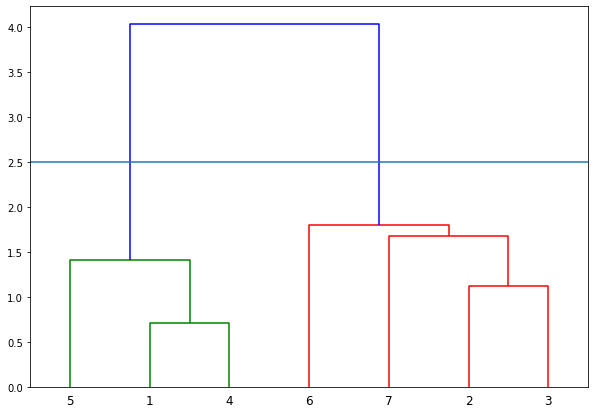

In [11]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(data,'single')
labellist=range(1,8)
plt.figure(figsize=(10,7))
dendrogram(linked,orientation='top',labels=labellist,distance_sort='descending',show_leaf_counts=True)
plt.axhline(y=2.5)
plt.show()

In [15]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

k=3
hclustering=AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='single')
hclustering.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [16]:
hclustering.fit_predict(data)

array([1, 0, 0, 1, 1, 2, 0], dtype=int64)

In [17]:
print(hclustering.labels_)

[1 0 0 1 1 2 0]


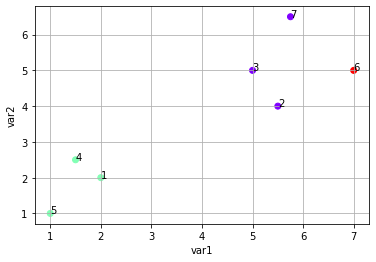

In [20]:
x=data['var1']
y=data['var2']
n=range(1,8)

fig,ax=plt.subplots()
ax.scatter(x,y,c=hclustering.labels_,cmap='rainbow')
plt.grid()
plt.xlabel('var1')
plt.ylabel('var2')
for i,txt in enumerate(n):
    ax.annotate(txt,(x[i],y[i]))